In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import seaborn as sns

In [2]:
data_keywords = pd.read_csv("keywords_raw.csv")

In [3]:
data_keywords

,article_id,keywords
0,53e99784b7602d9701f3e133,canopy parameters
1,53e99784b7602d9701f3e133,canopy spectrum
2,53e99784b7602d9701f3e133,different soil water content control
3,53e99784b7602d9701f3e133,winter wheat
4,53e99784b7602d9701f3e133,irrigation
...,...,...
33141796,60815a84e4510cd7c8660947,Image segmentation
33141797,60815a84e4510cd7c8660947,Three-dimensional displays
33141798,60815a84e4510cd7c8660947,Roads
33141799,60815a84e4510cd7c8660947,Conferences


### Data cleaning

In [5]:
data_keywords.isna().sum()

article_id       0
keywords      3656
dtype: int64

In [4]:
def isNaN(num):
    return num != num

def clean_chevrons(text):
    if isNaN(text):
        return None
    text = str(text)
    chevrons = re.compile("<.*?>")
    return chevrons.sub('', text)

In [5]:
data_keywords.keywords = data_keywords.keywords.apply(lambda x: clean_chevrons(x))

In [6]:
data_keywords.loc[data_keywords.keywords == '', "keywords"] = np.nan

In [7]:
data_keywords.isna().sum()

article_id       0
keywords      3717
dtype: int64

In [8]:
count_not_none = data_keywords[~data_keywords.article_id.isna()].groupby('article_id').count()

In [9]:
count_not_none = count_not_none[count_not_none.keywords > 0]

In [10]:
count_not_none

,keywords
article_id,
53e99784b7602d9701f3e133,17
53e99784b7602d9701f3e151,11
53e99784b7602d9701f3e15d,33
53e99784b7602d9701f3e161,4
53e99784b7602d9701f3e4f4,10
...,...
60815a84e4510cd7c8660930,7
60815a84e4510cd7c8660939,7
60815a84e4510cd7c866093e,7


In [11]:
none_keywords = data_keywords[data_keywords.keywords.isna()]

In [12]:
to_drop = list(none_keywords.merge(count_not_none, on = 'article_id', how = 'inner').article_id)

In [13]:
len(to_drop)

401

In [14]:
# drop NaN if "artical_id" has several keywords

cleared_df = data_keywords.drop(none_keywords[none_keywords.article_id.isin(to_drop)].index)

In [15]:
cleared_df

,article_id,keywords
0,53e99784b7602d9701f3e133,canopy parameters
1,53e99784b7602d9701f3e133,canopy spectrum
2,53e99784b7602d9701f3e133,different soil water content control
3,53e99784b7602d9701f3e133,winter wheat
4,53e99784b7602d9701f3e133,irrigation
...,...,...
33141796,60815a84e4510cd7c8660947,Image segmentation
33141797,60815a84e4510cd7c8660947,Three-dimensional displays
33141798,60815a84e4510cd7c8660947,Roads
33141799,60815a84e4510cd7c8660947,Conferences


In [16]:
cleared_df.isna().sum()

article_id       0
keywords      3316
dtype: int64

In [20]:
def clean(text):
    if isNaN(text) or (text is None):
        return None
    text = str(text)
    text = text.strip()
    alloud = [" ", "-"]
    
    return ''.join(c for c in text if (c.isalpha()) or (c in alloud) or c.isdigit())

In [18]:
cleared_df.keywords = cleared_df.keywords.apply(lambda x: clean(x))

In [19]:
cleared_df.isna().sum()

article_id       0
keywords      3316
dtype: int64

In [22]:
cleared_df = cleared_df.reset_index(drop=True)

In [23]:
cleared_df

,article_id,keywords
0,53e99784b7602d9701f3e133,canopy parameters
1,53e99784b7602d9701f3e133,canopy spectrum
2,53e99784b7602d9701f3e133,different soil water content control
3,53e99784b7602d9701f3e133,winter wheat
4,53e99784b7602d9701f3e133,irrigation
...,...,...
33141395,60815a84e4510cd7c8660947,Image segmentation
33141396,60815a84e4510cd7c8660947,Three-dimensional displays
33141397,60815a84e4510cd7c8660947,Roads
33141398,60815a84e4510cd7c8660947,Conferences


In [24]:
#transform ' ' to None

for i in range(len(cleared_df)):
    if cleared_df.keywords.values[i] is None:
        continue
    if cleared_df.keywords.values[i] == '':
        cleared_df.loc[i, 'keywords'] = None
        continue
    if cleared_df.keywords.values[i][0] == ' ':
        if set(cleared_df.keywords[i]) == set(' '):
            cleared_df.loc[i, 'keywords'] = None

### Repeated keywords within the same article

In [25]:
cleared_df[cleared_df.duplicated()]

,article_id,keywords
1005,53e99785b7602d9701f418bf,Direct Digital Frequency Synthesis
2071,53e99785b7602d9701f4276c,nature publishing group
2493,53e99785b7602d9701f4278a,nature publishing group
2562,53e99785b7602d9701f4278a,cell signalling
5268,53e9978ab7602d9701f47f50,nature publishing group
...,...,...
33127757,5fc9dc7ab0d046820d3d10a4,Partial discharges
33127820,5fc9dc7cb0d046820d3d138d,Data mining
33130148,5fd572ada4e4c3c83198e12d,Convolution
33130159,5fd572ada4e4c3c83198e127,Deconvolution


In [27]:
cleared_df.drop_duplicates(inplace=True)

### Most popular keywords

In [30]:
key_popularity = cleared_df.groupby('keywords').count()

In [31]:
rare_key = len(key_popularity[key_popularity.values == 1])
print(f'Number of keywords with one article id: {rare_key} ({round(rare_key/cleared_df.keywords.unique().shape[0] * 100,2)}%)')

Number of keywords with one article id: 6276051 (79.07%)


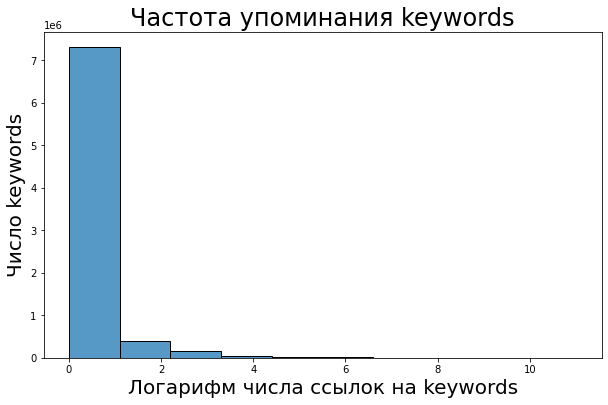

In [34]:
plt.figure(figsize=(10, 6))
histplot_ = sns.histplot(key_popularity.article_id.apply(math.log), bins=10)
histplot_.set_title("Частота упоминания keywords", fontsize=24)
histplot_.set_ylabel("Число keywords", fontsize=20)
histplot_.set_xlabel("Логарифм числа ссылок на keywords", fontsize=20)
plt.show()

Вывод: очень много кастомных keywords

In [35]:
popular_keyword = key_popularity[key_popularity.article_id > 1000].sort_values(by=['article_id'], ascending=False)

In [36]:
popular_keyword[:15]

,article_id
keywords,
data mining,60210
feature extraction,45685
computer science,44279
internet,42257
computational complexity,39836
real time,39751
protocols,33411
satisfiability,32172
neural network,32069


In [37]:
num_of_articles = len(cleared_df.article_id.unique())

In [38]:
num_of_articles

3413870

In [39]:
unique_top_keywords = len(cleared_df[cleared_df.keywords.isin(popular_keyword.index.values[:15])].article_id.unique())

In [40]:
unique_top_keywords / num_of_articles

0.1324725311742978

Вывод: топ 15 keywords покрывают 13% имеющихся статей

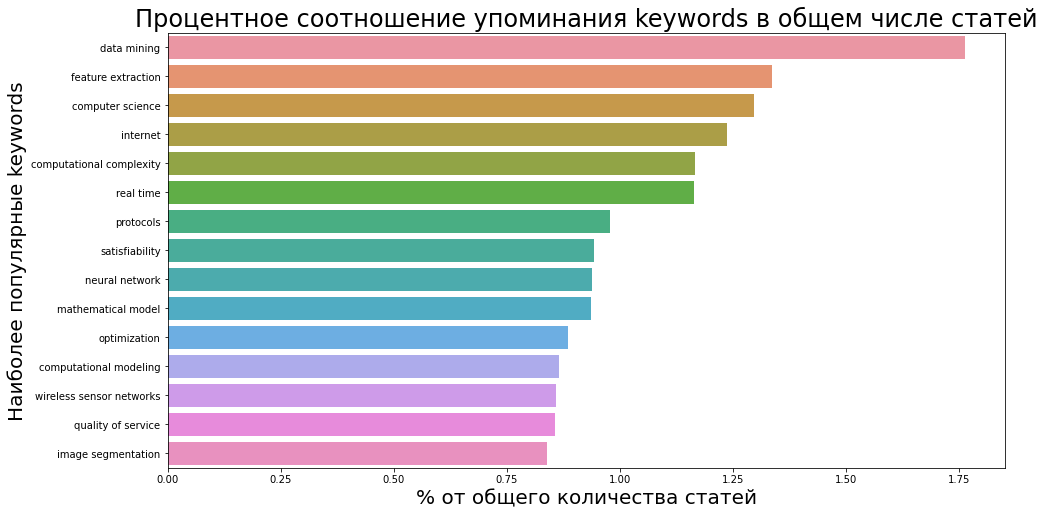

In [42]:
plt.figure(figsize=(15, 8))
barplot_ = sns.barplot((popular_keyword[:15] / num_of_articles * 100).reset_index(), y='keywords', x='article_id')
barplot_.set_title('Процентное соотношение упоминания keywords в общем числе статей', fontsize=24)
barplot_.set_ylabel("Наиболее популярные keywords", fontsize=20)
barplot_.set_xlabel("% от общего количества статей", fontsize=20)
plt.show()